In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense , Flatten,BatchNormalization, Conv2D , MaxPool2D , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import sklearn



In [2]:
 os.chdir('/Users/mohammedshabo/desktop/final_dataset/')
if os.path.isdir('train/0') is False:
    os.makedirs('train/0')
    os.makedirs('train/1')
    
    os.makedirs('valid/0')
    os.makedirs('valid/1')

    os.makedirs('test/0')
    os.makedirs('test/1')
 

    
    
    for c in random.sample(glob.glob('COVID*'),2531):
        shutil.move(c, 'train/1' )
    for c in random.sample(glob.glob('Normal*'),2531):
        shutil.move(c,'train/0')
   
    for c in random.sample(glob.glob('COVID*'),723):
        shutil.move(c,'valid/1')
    for c in random.sample(glob.glob('Normal*'),723):
        shutil.move(c,'valid/0')
         
    for c in random.sample(glob.glob('COVID*'),361):
        shutil.move(c,'test/1')
    for c in random.sample(glob.glob('Normal*'),361):
        shutil.move(c,'test/0')
 
    

In [3]:
os.chdir('../../')
train_path = '/Users/mohammedshabo/desktop/final_dataset/train/'
valid_path = '/Users/mohammedshabo/desktop/final_dataset/valid/'
test_path = '/Users/mohammedshabo/desktop/final_dataset/test/'
test_path2 = '/users/mohammedshabo/desktop/test2/'

In [56]:
 
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input, horizontal_flip = True, rotation_range =15,zoom_range=0.1,shear_range = 0.15,).flow_from_directory(directory=train_path, target_size=(224,224), class_mode='binary' , shuffle = True,batch_size=16)
     
validation_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), class_mode='binary', shuffle = True)

                                                                                                                                      
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), class_mode='binary',shuffle = False)
    
resnet_test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), class_mode='binary',shuffle = False)
    
inception_test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input).flow_from_directory(directory=test_path, target_size=(299,299), class_mode='binary',shuffle = False)
    

Found 5062 images belonging to 2 classes.
Found 1446 images belonging to 2 classes.
Found 722 images belonging to 2 classes.
Found 722 images belonging to 2 classes.
Found 722 images belonging to 2 classes.


In [5]:
train_batches.target_size

(224, 224)

In [9]:
images , labels = next(train_batches)

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize = (20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
        plt.tight_layout()
        plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


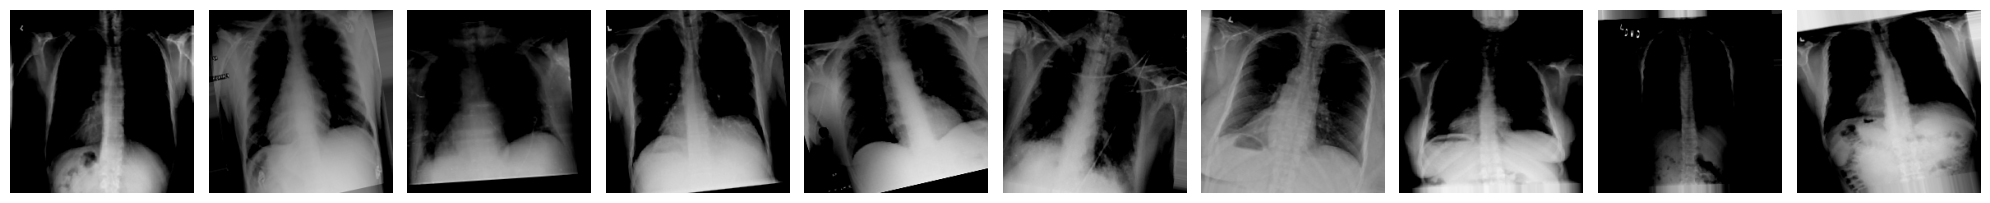

In [11]:
plotImages(images)
print(labels)

In [19]:
mobile_model = tf.keras.applications.mobilenet_v2.MobileNetV2()

In [20]:
mobile_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [21]:
x = mobile_model.layers[-2].output

In [37]:
q = tf.keras.layers.Dropout(0.2)(x)
z = tf.keras.layers.BatchNormalization()(q)
m = tf.keras.layers.Dropout(0.2)(z)
f = tf.keras.layers.Flatten()
s = tf.keras.layers.Dense(units=64,activation='relu')(m)
c = tf.keras.layers.Dense(units=64,activation='relu')(s)
o = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(c)

model = tf.keras.models.Model(inputs = mobile_model.input , outputs = o)

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [25]:
for layer in model.layers[:-6] :
    layer.trainable = False

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [26]:
checkpoint_filepath = '/Users/mohammedshabo/Desktop/mobile_model_github/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [41]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) , loss = 'binary_crossentropy', metrics = ['accuracy','Precision','Recall','AUC'])

In [43]:
history = model.fit(x = train_batches , validation_data = validation_batches , epochs = 30, callbacks=model_checkpoint_callback)

Epoch 1/30
317/317 [==============================] - 38s 121ms/step - loss: 0.3660 - accuracy: 0.8333 - precision: 0.8484 - recall: 0.8115 - auc: 0.9164 - val_loss: 0.3039 - val_accuracy: 0.8762 - val_precision: 0.9237 - val_recall: 0.8202 - val_auc: 0.9548
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 2/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 39s 123ms/step - loss: 0.3267 - accuracy: 0.8597 - precision: 0.8755 - recall: 0.8388 - auc: 0.9345 - val_loss: 0.2727 - val_accuracy: 0.8942 - val_precision: 0.9345 - val_recall: 0.8479 - val_auc: 0.9642
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 3/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 42s 133ms/step - loss: 0.2996 - accuracy: 0.8740 - precision: 0.8834 - recall: 0.8617 - auc: 0.9450 - val_loss: 0.2492 - val_accuracy: 0.9087 - val_precision: 0.9444 - val_recall: 0.8686 - val_auc: 0.9698
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 4/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 45s 143ms/step - loss: 0.2763 - accuracy: 0.8795 - precision: 0.8878 - recall: 0.8688 - auc: 0.9535 - val_loss: 0.2397 - val_accuracy: 0.9101 - val_precision: 0.9541 - val_recall: 0.8617 - val_auc: 0.9731
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 5/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 42s 132ms/step - loss: 0.2618 - accuracy: 0.8923 - precision: 0.9004 - recall: 0.8823 - auc: 0.9586 - val_loss: 0.2192 - val_accuracy: 0.9184 - val_precision: 0.9590 - val_recall: 0.8741 - val_auc: 0.9769
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 6/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 42s 131ms/step - loss: 0.2499 - accuracy: 0.8955 - precision: 0.8985 - recall: 0.8917 - auc: 0.9621 - val_loss: 0.2121 - val_accuracy: 0.9198 - val_precision: 0.9619 - val_recall: 0.8741 - val_auc: 0.9791
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 7/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 42s 132ms/step - loss: 0.2460 - accuracy: 0.8921 - precision: 0.8978 - recall: 0.8850 - auc: 0.9630 - val_loss: 0.1989 - val_accuracy: 0.9246 - val_precision: 0.9610 - val_recall: 0.8852 - val_auc: 0.9806
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 8/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 43s 136ms/step - loss: 0.2418 - accuracy: 0.9026 - precision: 0.9063 - recall: 0.8981 - auc: 0.9643 - val_loss: 0.1955 - val_accuracy: 0.9198 - val_precision: 0.9537 - val_recall: 0.8824 - val_auc: 0.9810
Epoch 9/30
317/317 [==============================] - 44s 139ms/step - loss: 0.2284 - accuracy: 0.9034 - precision: 0.9052 - recall: 0.9012 - auc: 0.9682 - val_loss: 0.1840 - val_accuracy: 0.9322 - val_precision: 0.9685 - val_recall: 0.8935 - val_auc: 0.9825
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 10/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 43s 135ms/step - loss: 0.2112 - accuracy: 0.9123 - precision: 0.9169 - recall: 0.9068 - auc: 0.9728 - val_loss: 0.1879 - val_accuracy: 0.9295 - val_precision: 0.9669 - val_recall: 0.8893 - val_auc: 0.9826
Epoch 11/30
317/317 [==============================] - 44s 137ms/step - loss: 0.1988 - accuracy: 0.9153 - precision: 0.9161 - recall: 0.9143 - auc: 0.9762 - val_loss: 0.1875 - val_accuracy: 0.9308 - val_precision: 0.9727 - val_recall: 0.8866 - val_auc: 0.9836
Epoch 12/30
317/317 [==============================] - 44s 139ms/step - loss: 0.2073 - accuracy: 0.9127 - precision: 0.9220 - recall: 0.9016 - auc: 0.9740 - val_loss: 0.1722 - val_accuracy: 0.9364 - val_precision: 0.9647 - val_recall: 0.9059 - val_auc: 0.9852
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 13/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 43s 137ms/step - loss: 0.1914 - accuracy: 0.9234 - precision: 0.9267 - recall: 0.9194 - auc: 0.9776 - val_loss: 0.1690 - val_accuracy: 0.9336 - val_precision: 0.9644 - val_recall: 0.9004 - val_auc: 0.9851
Epoch 14/30
317/317 [==============================] - 44s 139ms/step - loss: 0.2070 - accuracy: 0.9145 - precision: 0.9193 - recall: 0.9087 - auc: 0.9737 - val_loss: 0.1633 - val_accuracy: 0.9385 - val_precision: 0.9689 - val_recall: 0.9059 - val_auc: 0.9866
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 15/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 44s 137ms/step - loss: 0.1833 - accuracy: 0.9283 - precision: 0.9298 - recall: 0.9265 - auc: 0.9797 - val_loss: 0.1669 - val_accuracy: 0.9391 - val_precision: 0.9760 - val_recall: 0.9004 - val_auc: 0.9869
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 16/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 44s 137ms/step - loss: 0.1792 - accuracy: 0.9247 - precision: 0.9297 - recall: 0.9190 - auc: 0.9802 - val_loss: 0.1650 - val_accuracy: 0.9419 - val_precision: 0.9705 - val_recall: 0.9115 - val_auc: 0.9862
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 17/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 44s 138ms/step - loss: 0.1770 - accuracy: 0.9214 - precision: 0.9224 - recall: 0.9202 - auc: 0.9811 - val_loss: 0.1649 - val_accuracy: 0.9461 - val_precision: 0.9821 - val_recall: 0.9087 - val_auc: 0.9871
INFO:tensorflow:Assets written to: /Users/mohammedshabo/Desktop/mobile_model_github/assets
Epoch 18/30


/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 44s 139ms/step - loss: 0.1826 - accuracy: 0.9257 - precision: 0.9315 - recall: 0.9190 - auc: 0.9796 - val_loss: 0.1559 - val_accuracy: 0.9398 - val_precision: 0.9595 - val_recall: 0.9184 - val_auc: 0.9862
Epoch 19/30
317/317 [==============================] - 45s 143ms/step - loss: 0.1683 - accuracy: 0.9269 - precision: 0.9286 - recall: 0.9249 - auc: 0.9831 - val_loss: 0.1607 - val_accuracy: 0.9391 - val_precision: 0.9649 - val_recall: 0.9115 - val_auc: 0.9859
Epoch 20/30
317/317 [==============================] - 44s 140ms/step - loss: 0.1739 - accuracy: 0.9307 - precision: 0.9343 - recall: 0.9265 - auc: 0.9815 - val_loss: 0.1575 - val_accuracy: 0.9391 - val_precision: 0.9718 - val_recall: 0.9046 - val_auc: 0.9869
Epoch 21/30
317/317 [==============================] - 44s 140ms/step - loss: 0.1788 - accuracy: 0.9279 - precision: 0.9301 - recall: 0.9253 - auc: 0.9805 - val_loss: 0.1524 - val_accuracy: 0.9433 - val_precision: 0.9652 - val_recal

/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


317/317 [==============================] - 43s 136ms/step - loss: 0.1630 - accuracy: 0.9297 - precision: 0.9310 - recall: 0.9281 - auc: 0.9837 - val_loss: 0.1537 - val_accuracy: 0.9398 - val_precision: 0.9690 - val_recall: 0.9087 - val_auc: 0.9870
Epoch 25/30
317/317 [==============================] - 44s 139ms/step - loss: 0.1623 - accuracy: 0.9340 - precision: 0.9327 - recall: 0.9356 - auc: 0.9837 - val_loss: 0.1439 - val_accuracy: 0.9461 - val_precision: 0.9694 - val_recall: 0.9212 - val_auc: 0.9878
Epoch 26/30
317/317 [==============================] - 44s 140ms/step - loss: 0.1569 - accuracy: 0.9394 - precision: 0.9413 - recall: 0.9372 - auc: 0.9848 - val_loss: 0.1469 - val_accuracy: 0.9447 - val_precision: 0.9763 - val_recall: 0.9115 - val_auc: 0.9881
Epoch 27/30
317/317 [==============================] - 44s 140ms/step - loss: 0.1485 - accuracy: 0.9447 - precision: 0.9443 - recall: 0.9451 - auc: 0.9865 - val_loss: 0.1473 - val_accuracy: 0.9447 - val_precision: 0.9680 - val_recal

Text(0.5, 0, 'epoch')

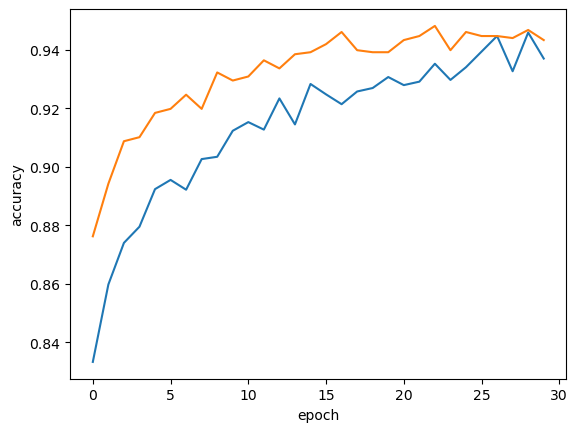

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

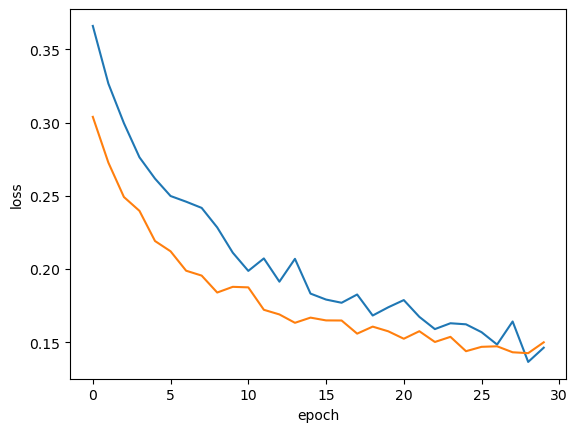

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [54]:
inception = tf.keras.models.load_model('/Users/mohammedshabo/Desktop/inception_paper/')
mobile = tf.keras.models.load_model('/users/mohammedshabo/desktop/mobile_model_github')

In [57]:
inception.evaluate(inception_test_batches)

2023-08-22 13:30:43.730065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 10s 389ms/step - loss: 0.1927 - accuracy: 0.9197 - precision: 0.9062 - recall: 0.9363 - auc: 0.9783


[0.1926581859588623,
 0.919667661190033,
 0.9061662554740906,
 0.9362881183624268,
 0.9783342480659485]

In [59]:
mobile.evaluate(test_batches)

2023-08-22 13:39:51.036641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 4s 148ms/step - loss: 0.1405 - accuracy: 0.9391 - precision: 0.9760 - recall: 0.9003 - auc: 0.9907


[0.14046403765678406,
 0.939058244228363,
 0.9759759902954102,
 0.9002770781517029,
 0.9906768798828125]

In [60]:
mobile_preds = mobile.predict(test_batches)
inception_preds = inception.predict(inception_test_batches)

2023-08-22 13:41:10.652330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-08-22 13:41:14.173581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [61]:
mobile_preds = np.array(mobile_preds)
inception_preds = np.array(inception_preds)

In [65]:
mobile_preds.shape

(722, 1)

In [90]:
ensemble_preds = np.append(mobile_preds,inception_preds,axis=1) 

In [91]:
ensemble_preds.shape

(722, 2)

In [92]:
ensemble_preds

array([[3.2836472e-04, 7.5156456e-01],
       [5.7479772e-03, 5.6903060e-03],
       [9.3284864e-03, 3.4503411e-03],
       ...,
       [9.9972695e-01, 9.9999011e-01],
       [9.9999869e-01, 9.9353635e-01],
       [9.4787431e-01, 9.4448376e-01]], dtype=float32)

In [118]:
averaged_preds = np.sum(ensemble_preds , axis = 1)/2

In [119]:
rounded_preds=np.round(averaged_preds)
rounded_preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [113]:
my_list = []
print(my_list)

[]


In [114]:

x = range(722)
for i in x:
    if i <361:
        my_list.append(0) 
    else:
        my_list.append(1)
 

In [115]:
for i in my_list:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [121]:
e_accuracy = sklearn.metrics.accuracy_score(my_list, rounded_preds)

In [122]:
print(e_accuracy)

0.9653739612188366


In [123]:
sklearn.metrics.recall_score(my_list, rounded_preds)


0.9390581717451524

In [124]:
sklearn.metrics.precision_score(my_list, rounded_preds)

0.9912280701754386

In [127]:
confusion_matrix = sklearn.metrics.confusion_matrix(my_list,rounded_preds)

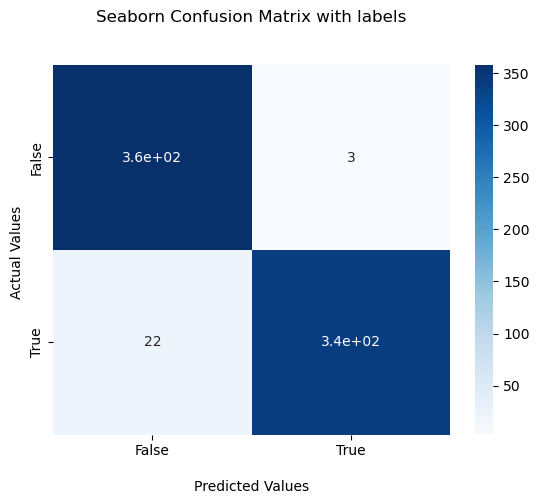

In [128]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()